# Position of a quasar

The position of a quasar could be estimated through instruments as GAIA. The measurement, however, is not free from errors. 

In the first case we suppose to have measurements of the position of a quasar with homoscedastic uncertainties to simulate for example the case in which the error of the instrument we are using is the main one. 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

Our hypothesis is that the values of the position of a quasar are distributed as a gaussian with mean $\mu = 1$ and $\sigma = 0.2$, in suitable units.

Text(0.5, 0, '$\\mu$')

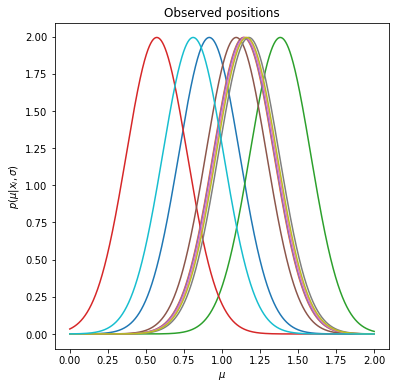

In [3]:
gauss = norm(loc=1, scale=0.2)   #gaussian from which I extract the observed values  
N_obs = 10                       #number of observations
np.random.seed(29)
x = gauss.rvs(N_obs)             #values of the observations

x_axis = np.linspace(0,2, int(1e6)) 

L = 1     #Likelihood function (initialised to 1 since I have to multiply stuff here)
ln_L = 0  #log_Likelihood function (initialised to 0 since I have to sum stuff here)

fig, ax = plt.subplots(1,1,figsize=(6,6))

for i in range(N_obs):
    gauss_measure = norm(loc = x[i], scale = 0.2) #in this vector I store the single gaussians with mean = extracted points 
                                                  #and sigma = 0.2
    plt.plot(x_axis, gauss_measure.pdf(x_axis))
    
    L = L*gauss_measure.pdf(x_axis)
    ln_L += gauss_measure.logpdf(x_axis)

ax.set_title('Observed positions')
ax.set_ylabel('$p(\mu|x_{i}, \sigma)$')
ax.set_xlabel('$\mu$')

The maximum of the Likelihood is found at: 1.05519


Text(0.5, 1.0, 'Log Likelihood')

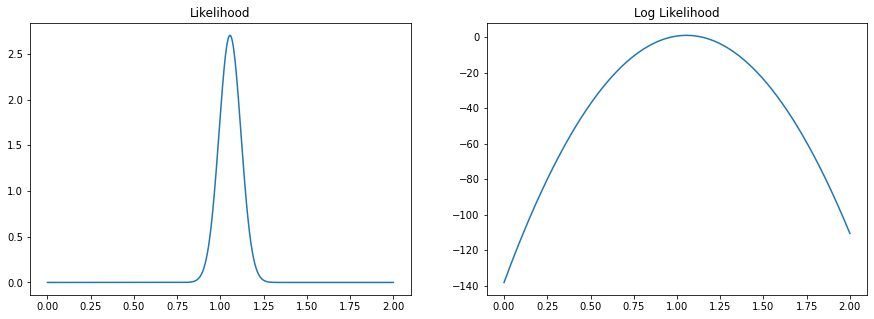

In [8]:
fig, ax = plt.subplots(1,2, figsize=(15,5))
ax[0].plot(x_axis, L)
ax[1].plot(x_axis, ln_L)

#finding the maximum of the Likelihood function
ind_max = np.argsort(L)[-1]
max_L = x_axis[ind_max]
print('The maximum of the Likelihood is found at: %.5f' %(max_L))

ax[0].set_title('Likelihood')

ax[1].set_title('Log Likelihood')

In [7]:
#evaluating the mean of the sample to compare it with the MLE e"empirical" estimator
mean_estimator = np.mean(x)
print('The mean of the sample is: %.5f' %mean_estimator)

The mean of the sample is: 1.05518


The two values are exactly equal until the fifth significative number.

In [9]:
#evaluating the error on the mean from the Likelihood

width = (x_axis[1:] - x_axis[:-1])[0]     #dx between each point of the x-grid
second_der = np.diff(ln_L, n=2)/width**2  #second derivative of the log_L

mean_err = (-1*second_der[ind_max-1])**(-0.5) #error on the mean estimated from the likelihood
print('The error on the mean as estimated from the Likelihood is: %.5f' %mean_err)

The error on the mean as estimated from the Likelihood is: 0.06325


In [10]:
#error on the mean as evaluated from theory

sigma_est = 0.2/np.sqrt(N_obs)
print('The error on the mean evaluated analitically: %.5f' %sigma_est)

The error on the mean evaluated analitically: 0.06325


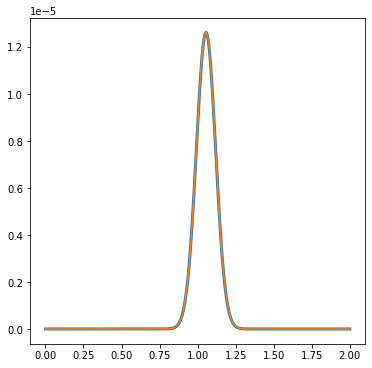

In [12]:
fig, ax = plt.subplots(1,1, figsize=(6,6))
resulting_g = norm.pdf(x_axis, loc=max_L, scale = sigma_est)

ax.plot(x_axis, L/np.sum(L), lw=3)
ax.plot(x_axis, resulting_g/np.sum(resulting_g))

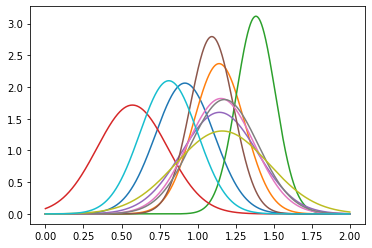

In [13]:
gauss_err = norm(loc=0.2, scale=0.05)
sigma = gauss_err.rvs(N_obs)
L_h = 1
ln_L_h = 0

for i in range(N_obs):
    gauss_measure = norm(loc = x[i], scale = sigma[i])
    plt.plot(x_axis, gauss_measure.pdf(x_axis))
    L_h = L_h *gauss_measure.pdf(x_axis)
    ln_L_h += gauss_measure.logpdf(x_axis)

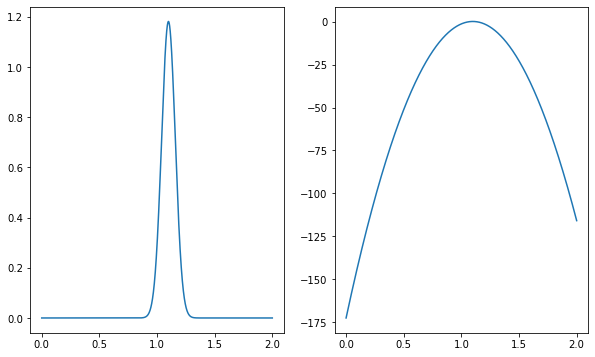

In [14]:
fig, ax = plt.subplots(1,2, figsize=(10,6))

ax[0].plot(x_axis, L_h)
ax[1].plot(x_axis, ln_L_h)

In [15]:
ind_max_h = np.argsort(L_h)[-1]
max_L_h = x_axis[ind_max_h]
print(max_L_h)

1.099151099151099


In [16]:
mean_h = np.sum(x/sigma**2)/np.sum(1/sigma**2)
print(mean_h)

1.0991508867375677


In [17]:
sigma_est = np.sum(1/sigma**2)**(-0.5)
print(sigma_est)

0.05911873751182243


In [19]:
#evaluating the error on the mean from the Likelihood
second_der_h = np.diff(ln_L_h, n=2)/width**2  #second derivative of the log_L

mean_err_h = (-1*second_der_h[ind_max_h-1])**(-0.5) #error on the mean estimated from the likelihood
print('The error on the mean as estimated from the Likelihood is: %.5f' %mean_err_h)

The error on the mean as estimated from the Likelihood is: 0.05912
